<a href="https://colab.research.google.com/github/MandigaNeeraja/Neeraja/blob/main/ex_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install squarify
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
# Load the dataset
data = pd.read_csv('/content/store_data.csv', header=None)
# Let's check the shape of the dataset
print("Shape of the dataset:", data.shape)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

Shape of the dataset: (7501, 20)
First few rows of the dataset:
              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13    

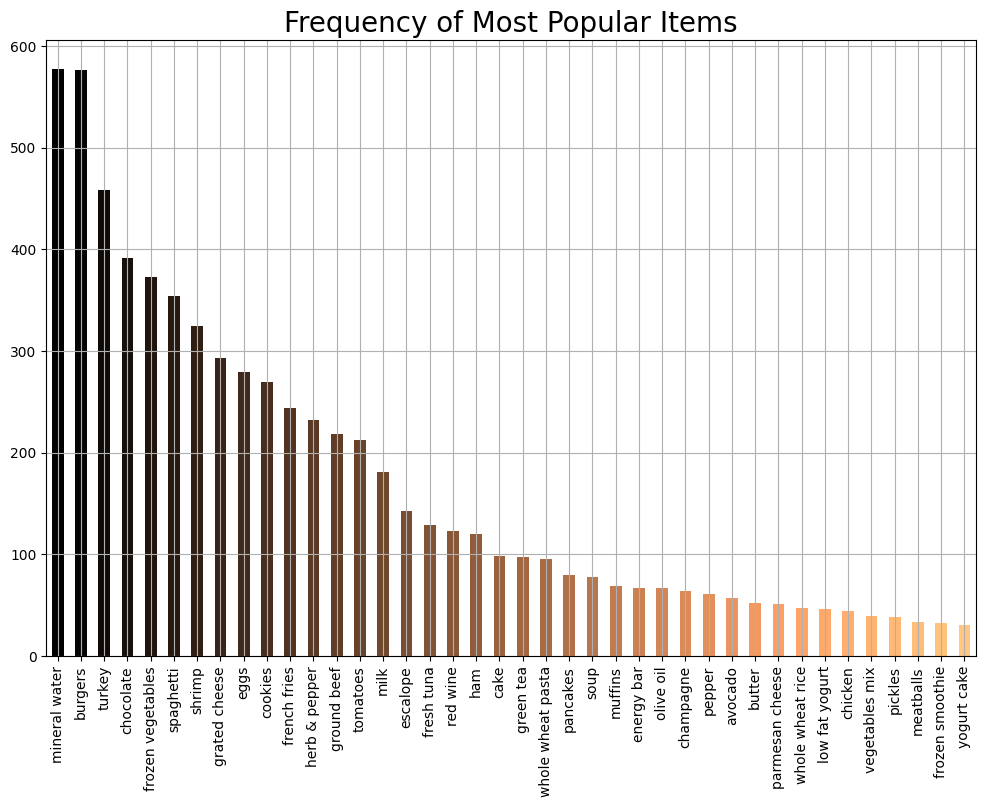

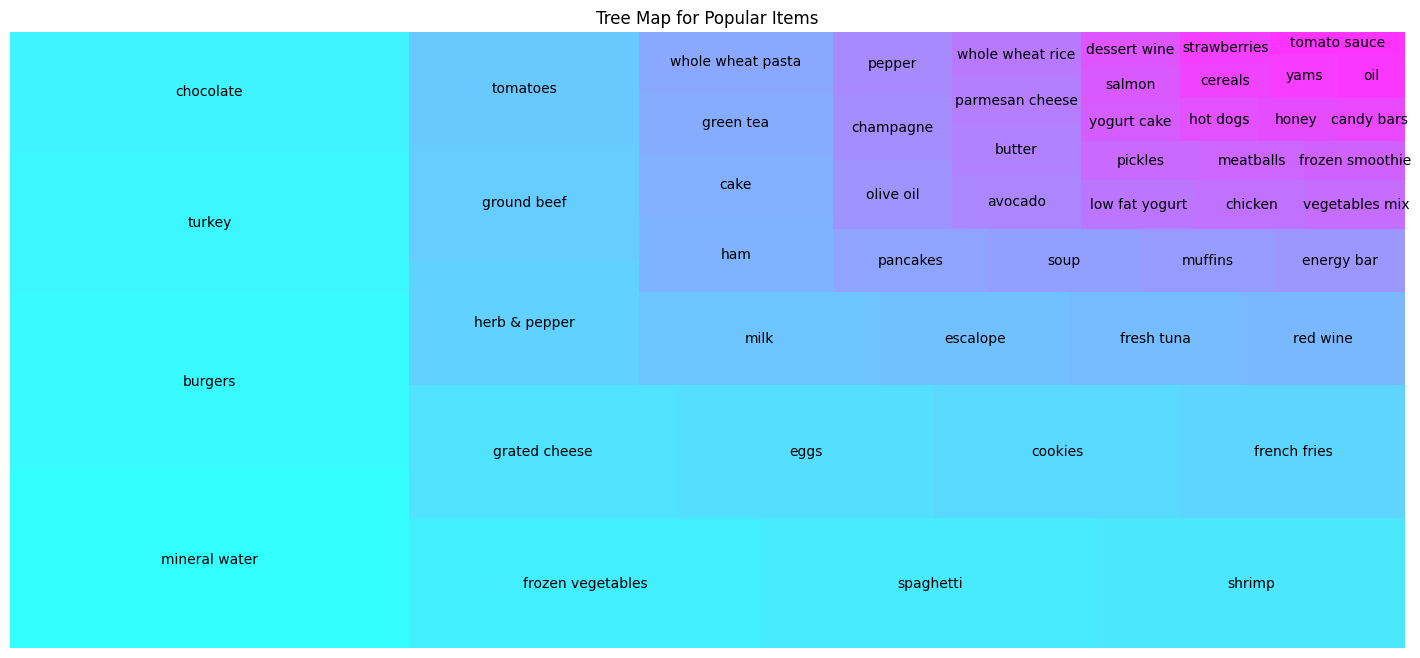

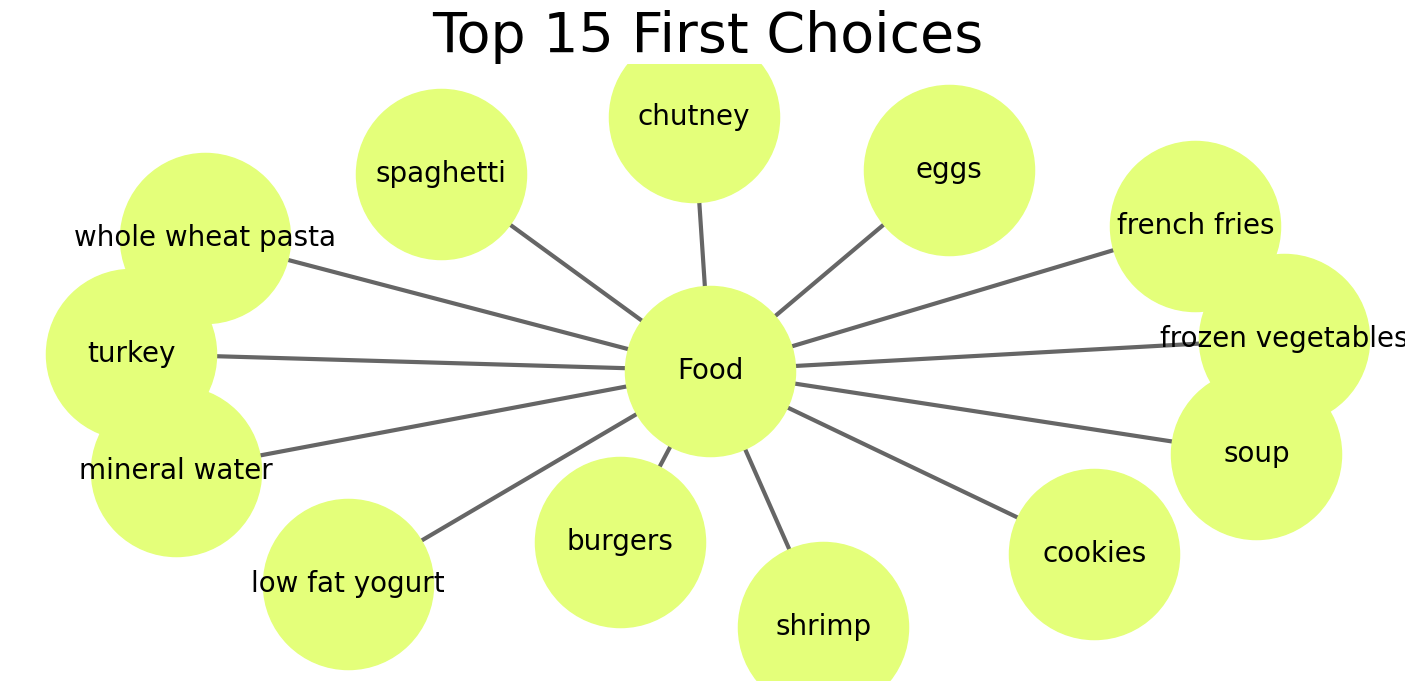

Frequent Itemsets with at least 5% support:
      support                               itemsets
0    1.000000                                 (Food)
1    0.087188                              (burgers)
2    0.081056                                 (cake)
3    0.059992                              (chicken)
4    0.163845                            (chocolate)
..        ...                                    ...
110  0.050927             (nan, eggs, mineral water)
111  0.059725        (nan, spaghetti, mineral water)
112  0.052660  (nan, Food, chocolate, mineral water)
113  0.050927       (nan, Food, eggs, mineral water)
114  0.059725  (nan, spaghetti, Food, mineral water)

[115 rows x 2 columns]


In [5]:
# Set the size of the plot
plt.rcParams['figure.figsize'] = (12, 8)
color = plt.cm.copper(np.linspace(0, 1, 40))
# Count the frequency of each item in the first column of the dataset
# Select the top 40 most frequent items and plot them as a bar chart
data[0].value_counts().head(40).plot.bar(color=color)
# Set the title of the plot
plt.title('Frequency of Most Popular Items', fontsize=20)
# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)
# Add grid lines to the plot
plt.grid()
# Display the plot
plt.show()
# Count the frequency of each item in the first column of the dataset
# Select the top 50 most frequent items and convert it to a DataFrame
y = data[0].value_counts().head(50).to_frame()
# Get the index (item names) from the DataFrame
y.index
# Set the size of the plot
plt.rcParams['figure.figsize'] = (18, 8)
# Generate a range of colors for the treemap
color = plt.cm.cool(np.linspace(0, 1, 50))
# Plot the treemap
squarify.plot(sizes=y.values, label=y.index, alpha=0.8, color=color)
# Set the title of the plot
plt.title('Tree Map for Popular Items')
# Turn off the axis
plt.axis('off')
# Display the plot
plt.show()
# Add a new column 'food' with all values set to 'Food'
data['food'] = 'Food'
# Select the top 15 rows from the dataset
food = data.truncate(before=-1, after=15)
# Import the networkx library
import networkx as nx
# Create a graph from the DataFrame using the 'food' column as the source and the first column (0-
#indexed) as the target
food = nx.from_pandas_edgelist(food, source='food', target=0, edge_attr=True)
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Set the size of the plot
plt.rcParams['figure.figsize'] = (18, 8)
# Generate the layout for the nodes
pos = nx.spring_layout(food)
# Generate colors for the nodes
color = plt.cm.Wistia(np.linspace(0, 15, 1))
# Draw the nodes with specified positions, sizes, and colors
nx.draw_networkx_nodes(food, pos, node_size=15000, node_color=color)
# Draw the edges of the graph
nx.draw_networkx_edges(food, pos, width=3, alpha=0.6, edge_color='black')
# Add labels to the nodes
nx.draw_networkx_labels(food, pos, font_size=20, font_family='sans-serif')
# Turn off the axis
plt.axis('off')
# Add grid lines
plt.grid()
# Set the title of the plot
plt.title('Top 15 First Choices', fontsize=40)
# Display the plot
plt.show()
# Convert the dataset into a list of lists format
transactions = []
for i in range(len(data)):
 transactions.append([str(data.values[i, j]) for j in range(len(data.columns))])
# Initialize TransactionEncoder
te = TransactionEncoder()
# Fit and transform the data into one-hot encoded format
te_ary = te.fit(transactions).transform(transactions)
# Convert one-hot encoded data into a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)
# Apply Apriori algorithm with min_support = 0.01
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
# Print the frequent itemsets
print("Frequent Itemsets with at least 5% support:")
print(frequent_itemsets)
